In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Multiply, Input, Concatenate, DepthwiseConv2D
from tensorflow.keras.regularizers import l2
from torchsummary import summary
import torchvision.transforms as transforms
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import torch.optim as optim


# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [9]:
train_path = "D:/D-Documents/Self-Improvement/Python/Computer Vision/Computer Vision Masterclass/Datasets/cat_dog_2/training_set"
test_path = "D:/D-Documents/Self-Improvement/Python/Computer Vision/Computer Vision Masterclass/Datasets/cat_dog_2/test_set"

In [10]:
# Define the transform for data augmentation
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(64, scale=(0.8, 1.2)),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=(0.75, 1.5))
])


transform = transforms.Compose([
    transforms.Resize((227, 227)),          # Resize the image to 227x227
    transforms.ToTensor(),                  # Convert the image to a tensor
    transforms.RandomHorizontalFlip(),      # Randomly flip the image horizontally
    transforms.RandomResizedCrop(227, scale=(0.8, 1.2)),  # Randomly crop the image
    transforms.RandomRotation(20),          # Randomly rotate the image
    transforms.ColorJitter(brightness=(0.75, 1.5))  # Randomly change the brightness
])


In [11]:
train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:

# Add new fully connected layer to the model

# Load pre-trained ResNet model
model = models.resnet18(pretrained=True)

# Modify the fully connected layer for new task
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(train_dataset.classes))
model = model.to(device)


In [ ]:

# Unfreeze layers by their number

# Load pre-trained ResNet model
model = models.resnet18(pretrained=True)

# Freeze all layers initially
for param in model.parameters():
    param.requires_grad = False

# Unfreeze specific layers (e.g., the last convolutional block)
for name, param in model.named_parameters():
    if "layer4" in name:  # Unfreeze the last block (layer4)
        param.requires_grad = True

# Modify the fully connected layer for the new task
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(train_dataset.classes))

# Move the model to the appropriate device
model = model.to(device)

# Verify which layers are trainable
for name, param in model.named_parameters():
    print(f"{name}: {'Trainable' if param.requires_grad else 'Frozen'}")

In [ ]:

# Unfreeze the last 'n' layers

# Load pre-trained ResNet model
model = models.resnet18(pretrained=True)

# Freeze all layers initially
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the last 'n' layers
n = 25  # Number of layers to unfreeze
params = list(model.named_parameters())  # Get a list of all layers with names
for name, param in params[-n:]:  # Select the last 'n' layers
    param.requires_grad = True

# Modify the fully connected layer for the new task
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(train_dataset.classes))

# Move the model to the appropriate device
model = model.to(device)

# Verify which layers are trainable
for name, param in model.named_parameters():
    print(f"{name}: {'Trainable' if param.requires_grad else 'Frozen'}")


conv1.weight: Frozen
bn1.weight: Frozen
bn1.bias: Frozen
layer1.0.conv1.weight: Frozen
layer1.0.bn1.weight: Frozen
layer1.0.bn1.bias: Frozen
layer1.0.conv2.weight: Frozen
layer1.0.bn2.weight: Frozen
layer1.0.bn2.bias: Frozen
layer1.1.conv1.weight: Frozen
layer1.1.bn1.weight: Frozen
layer1.1.bn1.bias: Frozen
layer1.1.conv2.weight: Frozen
layer1.1.bn2.weight: Frozen
layer1.1.bn2.bias: Frozen
layer2.0.conv1.weight: Frozen
layer2.0.bn1.weight: Frozen
layer2.0.bn1.bias: Frozen
layer2.0.conv2.weight: Frozen
layer2.0.bn2.weight: Frozen
layer2.0.bn2.bias: Frozen
layer2.0.downsample.0.weight: Frozen
layer2.0.downsample.1.weight: Frozen
layer2.0.downsample.1.bias: Frozen
layer2.1.conv1.weight: Frozen
layer2.1.bn1.weight: Frozen
layer2.1.bn1.bias: Frozen
layer2.1.conv2.weight: Frozen
layer2.1.bn2.weight: Frozen
layer2.1.bn2.bias: Frozen
layer3.0.conv1.weight: Frozen
layer3.0.bn1.weight: Frozen
layer3.0.bn1.bias: Frozen
layer3.0.conv2.weight: Frozen
layer3.0.bn2.weight: Frozen
layer3.0.bn2.bias: F

In [ ]:


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


d:\D-Program Files\Python\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\D-Program Files\Python\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\pc/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:04<00:00, 10.8MB/s]


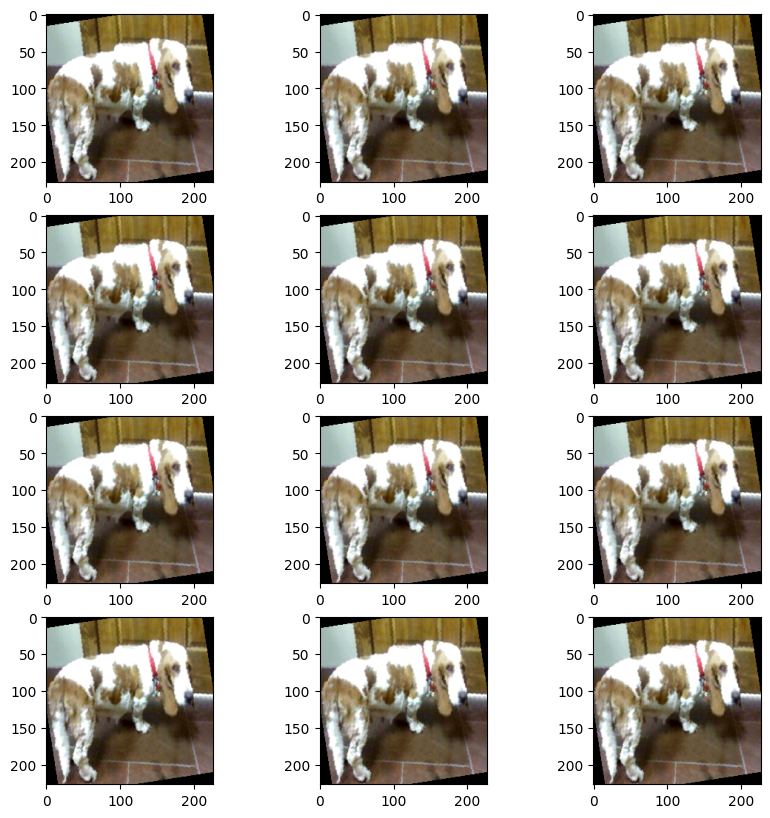

In [16]:
# Visualize some training images
fig, axs = plt.subplots(4, 3, figsize=(10, 10))
for i, (img, _) in enumerate(train_loader):
    if i == 1: break
    for j in range(4):
        for k in range(3):
            axs[j][k].imshow(img[0].permute(1, 2, 0).numpy())
plt.show()

In [17]:
def train_model(model, criterion, optimizer, train_loader, test_loader, device, num_epochs=10):
    """
    Train and validate the model.

    Args:
        model: The PyTorch model to train.
        criterion: Loss function.
        optimizer: Optimizer for model parameters.
        train_loader: DataLoader for training data.
        test_loader: DataLoader for validation data.
        device: Device to run the model (CPU or GPU).
        num_epochs: Number of epochs to train.

    Returns:
        model: Trained model.
    """
    best_accuracy = 0.0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 30)

        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        print(f"Training Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Statistics
                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == labels.data)

        val_loss = val_running_loss / len(test_loader.dataset)
        val_acc = val_running_corrects.double() / len(test_loader.dataset)

        print(f"Validation Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

        # Save the best model
        if val_acc > best_accuracy:
            best_accuracy = val_acc
            torch.save(model.state_dict(), "best_model.pth")
            print("Best model saved!")

    print("Training complete")
    print(f"Best Validation Accuracy: {best_accuracy:.4f}")
    return model


In [18]:

# Train the model
model = train_model(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    train_loader=train_loader,
    test_loader=test_loader,
    device=device,
    num_epochs=10  # Adjust the number of epochs as needed
)

Epoch 1/10
------------------------------
Training Loss: 0.2172 Acc: 0.9080
Validation Loss: 0.0868 Acc: 0.9710
Best model saved!
Epoch 2/10
------------------------------
Training Loss: 0.0808 Acc: 0.9703
Validation Loss: 0.0908 Acc: 0.9640
Epoch 3/10
------------------------------
Training Loss: 0.0554 Acc: 0.9780
Validation Loss: 0.0682 Acc: 0.9770
Best model saved!
Epoch 4/10
------------------------------
Training Loss: 0.0570 Acc: 0.9773
Validation Loss: 0.0714 Acc: 0.9720
Epoch 5/10
------------------------------
Training Loss: 0.0545 Acc: 0.9773
Validation Loss: 0.0665 Acc: 0.9710
Epoch 6/10
------------------------------
Training Loss: 0.0421 Acc: 0.9833
Validation Loss: 0.0599 Acc: 0.9750
Epoch 7/10
------------------------------
Training Loss: 0.0386 Acc: 0.9865
Validation Loss: 0.0716 Acc: 0.9670
Epoch 8/10
------------------------------
Training Loss: 0.0299 Acc: 0.9890
Validation Loss: 0.0537 Acc: 0.9790
Best model saved!
Epoch 9/10
------------------------------
Training